# Clone mã nguồn YOLOv8 và Cài đặt các Gói Cần Thiết


In [ ]:
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
!pip install -U ultralytics


Cloning into 'ultralytics'...
remote: Enumerating objects: 25790, done.
remote: Counting objects: 100% (428/428), done.
remote: Compressing objects: 100% (226/226), done.
remote: Total 25790 (delta 277), reused 311 (delta 202), pack-reused 25362
Receiving objects: 100% (25790/25790), 15.07 MiB | 13.88 MiB/s, done.
Resolving deltas: 100% (18247/18247), done.
/content/ultralytics
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.0/757.0 kB 12.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nv

# Tải Mô Hình Đã Huấn Luyện Trước


In [ ]:
from ultralytics import YOLO

# Tải mô hình YOLOv8 đã huấn luyện trước
model = YOLO('yolov8s.pt')


100%|██████████| 21.5M/21.5M [00:00<00:00, 338MB/s]


## Tải Bộ Dữ Liệu


In [ ]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1--0QuKMwj31K-CSvD8oq5fceFweiFPuN
!unzip human_detection_dataset.zip -d ./data/


## Chuẩn Bị File .yaml

Tạo file cấu hình .yaml

In [ ]:
data_yaml = """
path: ./data/
train: images/train
val: images/val

nc: 1
names: ['human']
"""

with open('data/human_detection.yaml', 'w') as f:
    f.write(data_yaml)


# Huấn Luyện Mô Hình

In [ ]:
# Huấn luyện mô hình


model.train(data='/content/ultralytics/data/human_detection_dataset/data.yaml', epochs=100, imgsz=640, batch=16, name='yolov8s_results')


Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/ultralytics/data/human_detection_dataset/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_results, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

100%|██████████| 755k/755k [00:00<00:00, 111MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 253MB/s]


AMP: checks passed ✅


train: Scanning /content/ultralytics/data/human_detection_dataset/train/labels... 2220 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2220/2220 [00:01<00:00, 1864.05it/s]


train: New cache created: /content/ultralytics/data/human_detection_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/ultralytics/data/human_detection_dataset/val/labels... 1642 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1642/1642 [00:02<00:00, 736.44it/s]


val: New cache created: /content/ultralytics/data/human_detection_dataset/val/labels.cache
Plotting labels to /content/ultralytics/runs/detect/yolov8s_results/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/ultralytics/runs/detect/yolov8s_results
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      4.27G      1.057     0.8964      1.059        165        640: 100%|██████████| 139/139 [02:14<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [01:05<00:00,  1.27s/it]


                   all       1642      13171      0.673      0.595      0.646      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      4.24G      1.077     0.7903      1.063        151        640: 100%|██████████| 139/139 [02:07<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [01:03<00:00,  1.22s/it]


                   all       1642      13171      0.808      0.664      0.753      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      4.23G      1.049     0.7574      1.053        161        640: 100%|██████████| 139/139 [02:06<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [01:05<00:00,  1.26s/it]


                   all       1642      13171       0.82      0.652       0.75       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      4.21G     0.9931     0.7028      1.027        125        640: 100%|██████████| 139/139 [02:05<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [01:03<00:00,  1.21s/it]


                   all       1642      13171      0.847       0.65       0.77      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.22G     0.9172     0.6392      1.006        166        640: 100%|██████████| 139/139 [02:06<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [01:07<00:00,  1.30s/it]


                   all       1642      13171      0.858      0.726      0.831      0.556

5 epochs completed in 0.273 hours.
Optimizer stripped from /content/ultralytics/runs/detect/yolov8s_results/weights/last.pt, 22.5MB
Optimizer stripped from /content/ultralytics/runs/detect/yolov8s_results/weights/best.pt, 22.5MB

Validating /content/ultralytics/runs/detect/yolov8s_results/weights/best.pt...
Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [01:06<00:00,  1.28s/it]


                   all       1642      13171      0.859      0.727      0.831      0.556
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/ultralytics/runs/detect/yolov8s_results


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bd39697b370>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# *Predict*

## ảnh

In [ ]:
results = model.predict(source='/content/ultralytics/data/human_detection_dataset/train/images/frame007.05.00-07.10.00.jpg', save=True)




image 1/1 /content/ultralytics/data/human_detection_dataset/train/images/frame007.05.00-07.10.00.jpg: 384x640 9 Humans, 454.5ms
Speed: 15.5ms preprocess, 454.5ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/ultralytics/runs/detect/yolov8s_results4


## video

In [ ]:
results = model.predict(source='/content/drive/MyDrive/yolov8s_results2/ngoc.mp4', save=True)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/143) /content/drive/MyDrive/yolov8s_results2/ngoc.mp4: 384x640 3 Humans, 16.3ms
video 1/1 (frame 2/143) /content/drive/MyDrive/yolov8s_results2/ngoc.mp4: 384x640 2 Humans, 12.3ms
video 1/1 (frame 3/143) /content/drive/MyDrive/yolov8s_results2/ngoc.mp4: 384x640 3 Humans, 14.4ms
video 1/1 (frame 4/143) /content/drive/MyDrive/yolov8s_results2/ngoc.mp4: 384x640 3 Humans, 11.4ms
video 1/1 (frame 5/143) /content/drive/MyDrive/yolov8s_resul

## Hiển Thị Kết Quả

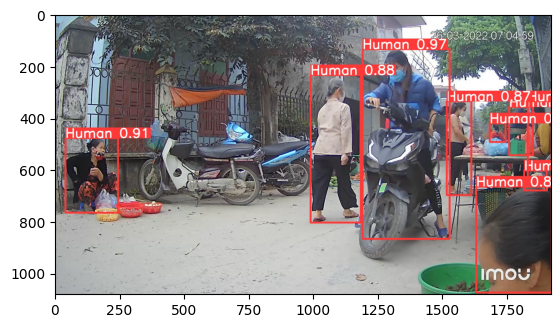

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Đọc và hiển thị hình ảnh với dự đoán
img = cv2.imread('/content/ultralytics/runs/detect/yolov8s_results4/frame007.05.00-07.10.00.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


# Đánh Giá Mô Hình

In [ ]:
metrics = model.val()


Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/ultralytics/data/human_detection_dataset/val/labels.cache... 1642 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1642/1642 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [01:36<00:00,  1.07it/s]


                   all       1642      13171       0.86      0.726      0.831      0.558
Speed: 0.4ms preprocess, 6.3ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to /content/ultralytics/runs/detect/yolov8s_results2
